In [117]:
# Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

#Part 1

In [118]:
# Importing librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
# Loading data
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
display(df.head())
df.info()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Cleaning

In [120]:
df = df.drop(columns = 'id')
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [121]:
print('There are',df.duplicated().sum(),'duplicate rows.')

There are 0 duplicate rows.


In [122]:
# Locating missing values

In [123]:
df.count()

gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [124]:
print('There are', df.isna().sum().sum(),'missing values:')
print(df.isna().sum())
print((df.isna().sum().sum()/5110)*100)

There are 201 missing values:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
3.9334637964774952


Since our missing values consitute less than 5 percent of the data, we will go ahead and drop those rows

In [125]:
df.dropna(inplace = True)
print('There are', df.isna().sum().sum(),'missing values:')

There are 0 missing values:


In [126]:
# Looking for inconsistencies in categorical values
for col in df.columns:
    if df[col].dtype == 'object':
        print(col,':\n',df[col].unique(),'\n')

gender :
 ['Male' 'Female' 'Other'] 

ever_married :
 ['Yes' 'No'] 

work_type :
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] 

Residence_type :
 ['Urban' 'Rural'] 

smoking_status :
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown'] 



Nothing out of the ordinary here.

In [127]:
# Looking for outliers in numerical data
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


An age of .08 isn't possible. And a bmi of 10.3 is unrealistic/fatal. I'll remove these values from the data. 

In [128]:
df = df[df['age'] > 1] # any lower of an age is impossible
df = df[df['bmi'] >15] # any lower of a bmi is unrealistic/severely underweight and very questionable
# rechecking for outliers
df.describe()	

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000
mean,43.502218,0.093264,0.050363,105.400852,29.111358,0.043316
std,22.134258,0.290833,0.218715,44.589156,7.730216,0.203589
min,1.080000,0.000000,0.000000,55.120000,15.100000,0.000000
25%,26.000000,0.000000,0.000000,77.010000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.680000,28.200000,0.000000
75%,61.000000,0.000000,0.000000,113.630000,33.200000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


[x] Deleted unnecessary columns.

[x] Deleted duplicate rows.

[x] Identified and addressed missing values.

[x] Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

[x] Produced univariate visuals for the target and all features.

[x] Identified outliers.

[x] Clearly commented all of your cleaning steps and described any decisions you 
made.

[x] Commit your file to your Github repository and submit the link below.

#Part 2

<Axes: xlabel='stroke', ylabel='count'>

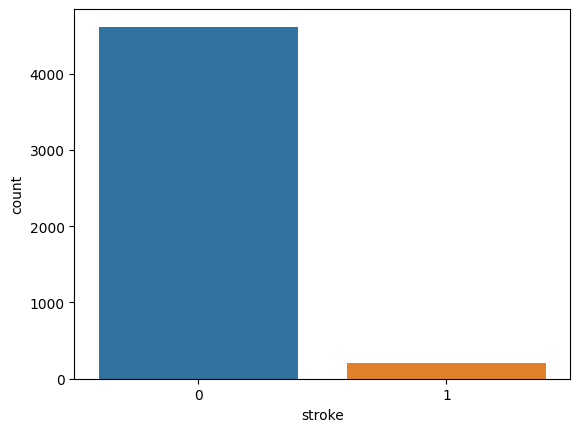

In [129]:
sns.countplot(data = df, x = 'stroke')

<Axes: xlabel='bmi'>

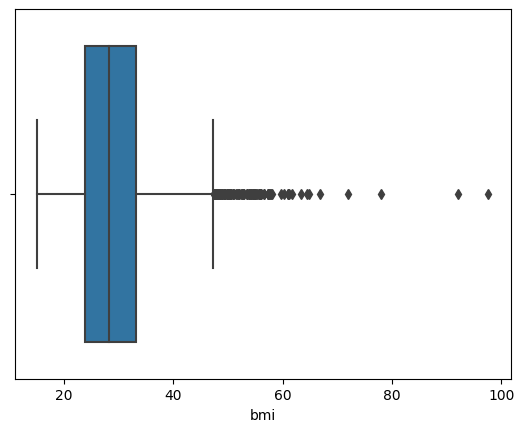

In [130]:
sns.boxplot(df, x ='bmi')

<Axes: xlabel='count', ylabel='ever_married'>

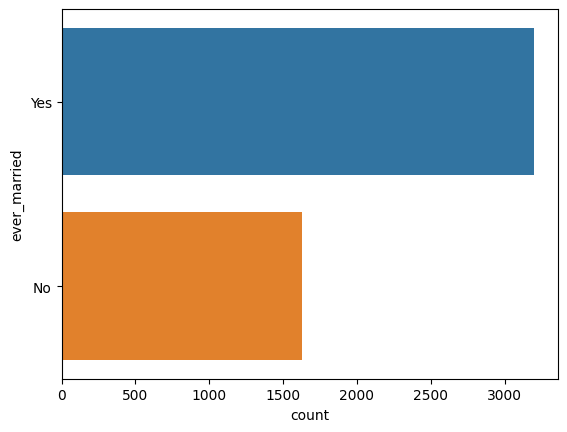

In [131]:
sns.countplot(data=df, y = 'ever_married')

<Axes: xlabel='age', ylabel='stroke'>

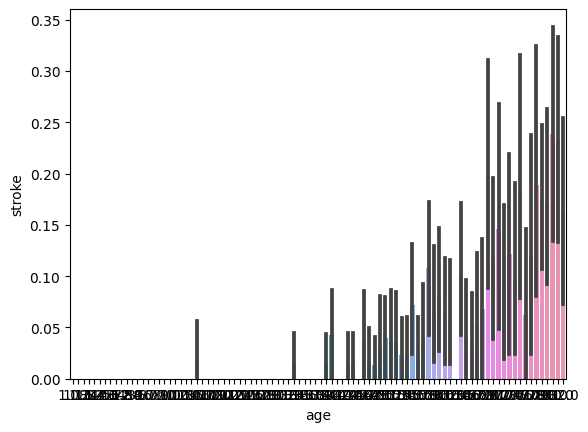

In [132]:
sns.barplot(data=df, x = 'age', y = 'stroke')

<Axes: xlabel='stroke', ylabel='hypertension'>

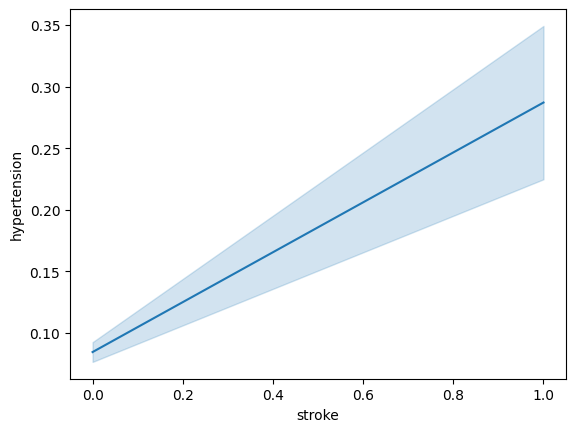

In [133]:
sns.lineplot(data=df, y = 'hypertension', x = 'stroke')

<Axes: ylabel='avg_glucose_level'>

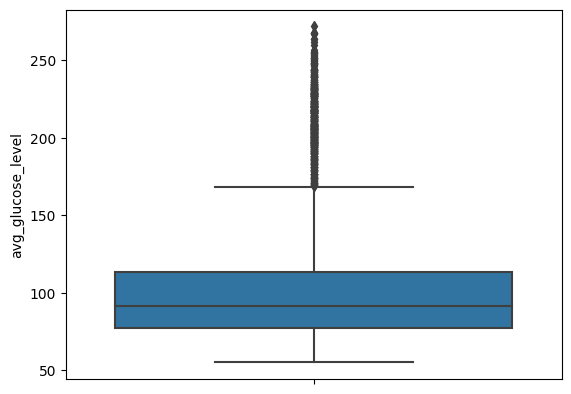

In [134]:
sns.boxplot(data=df, y = 'avg_glucose_level')

<Axes: xlabel='stroke', ylabel='smoking_status'>

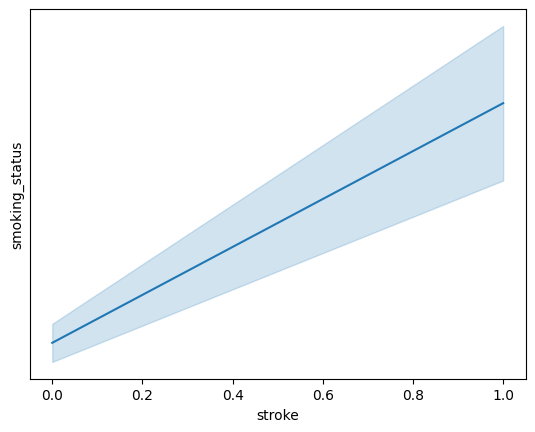

In [135]:
sns.lineplot(data=df, y = 'smoking_status', x = 'stroke')

<Axes: xlabel='work_type', ylabel='count'>

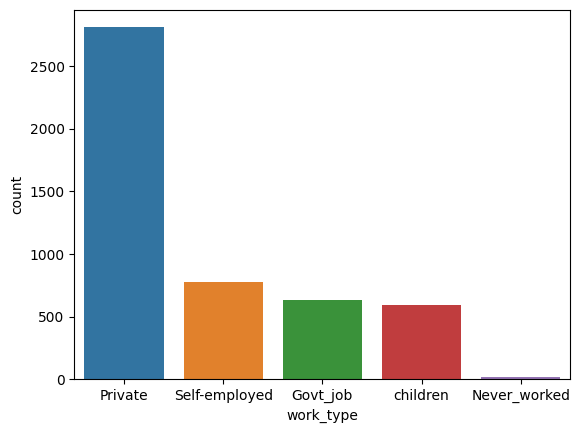

In [136]:
sns.countplot(data = df, x = 'work_type')

<Axes: xlabel='Residence_type', ylabel='stroke'>

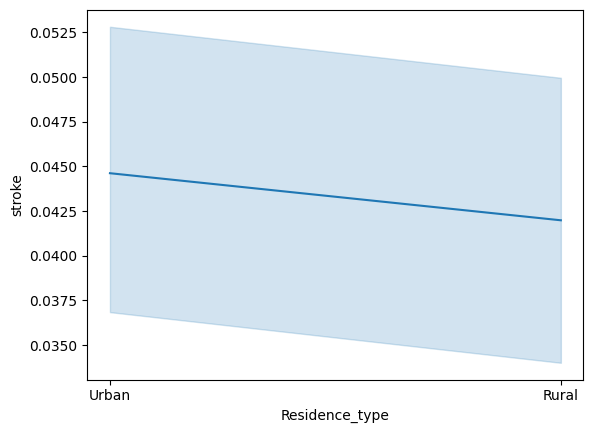

In [137]:
sns.lineplot(data = df, x = 'Residence_type', y = 'stroke')

<Axes: xlabel='age'>

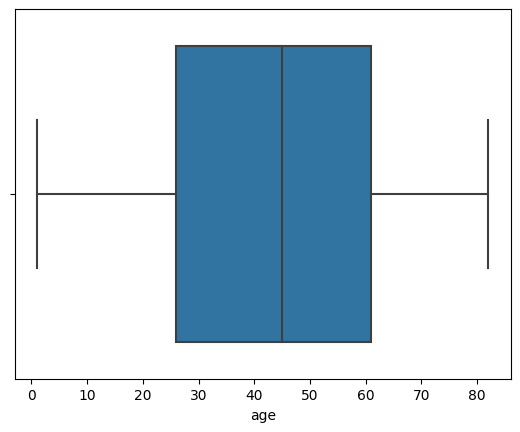

In [138]:
sns.boxplot(data = df, x = 'age')

<Axes: xlabel='smoking_status', ylabel='count'>

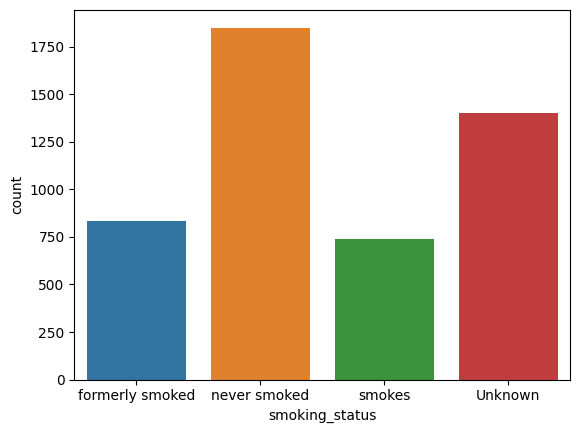

In [139]:
sns.countplot(data = df,x = 'smoking_status')

<Axes: xlabel='bmi', ylabel='count'>

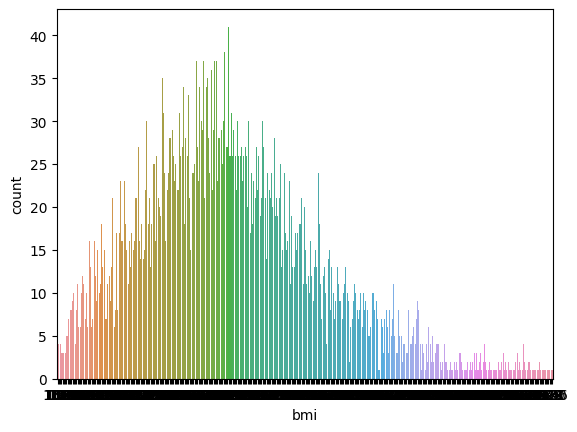

In [140]:
sns.countplot(data = df, x = 'bmi')

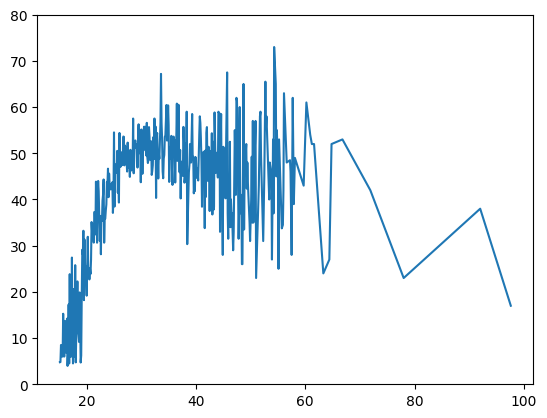

In [141]:
bmi_avg_age=df.groupby(['bmi'])[['age']].mean()
plt.plot(bmi_avg_age)
plt.yticks(range(0,int(df['age'].max()),10));


#Part 3

<ipython-input-142-0c6989c3ace4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Purples',annot=True);


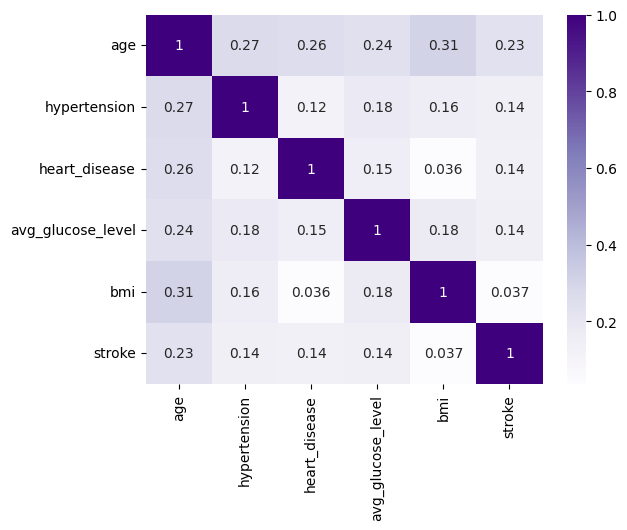

In [142]:
sns.heatmap(df.corr(),cmap='Purples',annot=True);

There is a very low correlation between features and between features and target across the board. None of our features have a correlation of greater than 0.31. The feature with the highest correlation to our 'stroke' target is 'age' with a correlation of 0.23. 

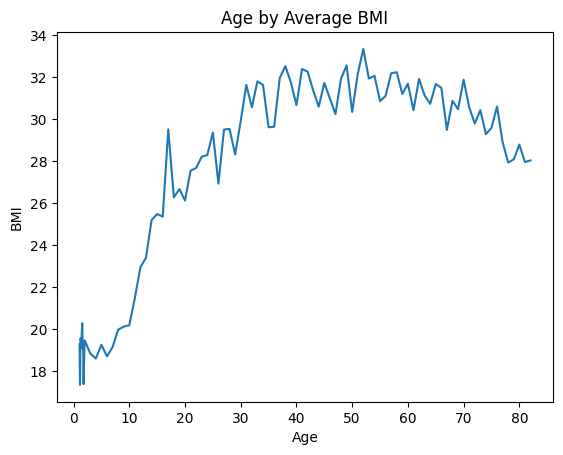

In [143]:
group_age_avg_bmi=df.groupby('age')['bmi'].mean()
plt.plot(group_age_avg_bmi)
plt.ylabel('BMI')
plt.xlabel('Age')
plt.title('Age by Average BMI')
plt.show();

**Trend**:

This plot shows a positive correlation between age and average bmi. The data shows that average bmi increase as age does. Of all features, 'age' has the strongest correlation with our target, 'stroke'. In a way, this correlation demonstrates that having a higher BMI increases the risk of having a stroke.

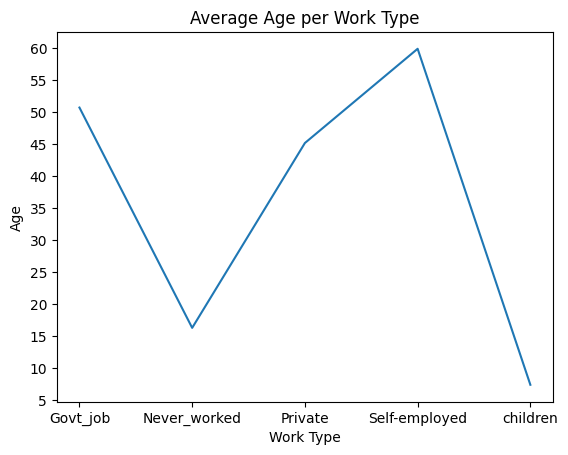

In [144]:
group_work_type_avg_age=df.groupby('work_type')['age'].mean()
plt.plot(group_work_type_avg_age)
plt.title('Average Age per Work Type')
plt.xlabel('Work Type')
plt.ylabel('Age')
plt.yticks(range(5,65,5))
plt.show();

**Trend**:

This plot shows that patients with presumably higher stressful occupations are also older on average. This means that there is an indirect link from 'work_type' and our 'stroke' target. The previously shown heatmap shows the highest correlation between age and risk of sroke. 